In [6]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

# 绘制三维图
from mpl_toolkits.mplot3d import Axes3D

In [12]:
football = pd.read_csv("./AsiaFootball.txt", header=None)
football.columns = ["国家", "2006世界杯", "2010世界杯", "2007亚洲杯"]

football.head()

,国家,2006世界杯,2010世界杯,2007亚洲杯
0,中国,50,50,9
1,日本,28,9,4
2,韩国,17,15,3
3,伊朗,25,40,5
4,沙特,28,40,2


In [17]:
# 提取训练数据

X_train = football[[ "2006世界杯", "2010世界杯", "2007亚洲杯"]]

kmeans = KMeans(n_clusters=3)
kmeans.fit(X_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [19]:
y_ = kmeans.predict(X_train)
y_

array([2, 1, 1, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 0, 2])

In [21]:
for i in range(3):
    index = np.argwhere(y_ == i)
    # 更具索引输出数据
    for ind in index:
        print(football["国家"][ind[-1]], end=" ")
    print()

伊朗 沙特 乌兹别克斯坦 巴林 朝鲜 
日本 韩国 
中国 伊拉克 卡塔尔 阿联酋 泰国 越南 阿曼 印尼 


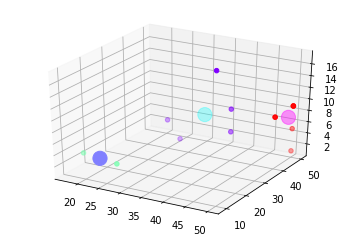

In [40]:
# 绘图展示

axes3d = plt.subplot(projection="3d")
axes3d.scatter3D(X_train["2006世界杯"], 
                 X_train.loc[:, "2010世界杯"], 
                 X_train["2007亚洲杯"],
                 c=y_, cmap="rainbow")

# 绘制聚类的中心点
centers = kmeans.cluster_centers_

axes3d.scatter3D(centers[:, 0], 
                 centers[:, 1],
                 centers[:, 2],
                 c=kmeans.predict(centers),
                 s=200,
                cmap="cool")

In [41]:
from sklearn.datasets import make_blobs

In [42]:
X_train, y_train = make_blobs(n_samples=180, centers=4)